[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/maticvl/dataHacker/blob/master/pyTorch/003_linearRegression.ipynb)

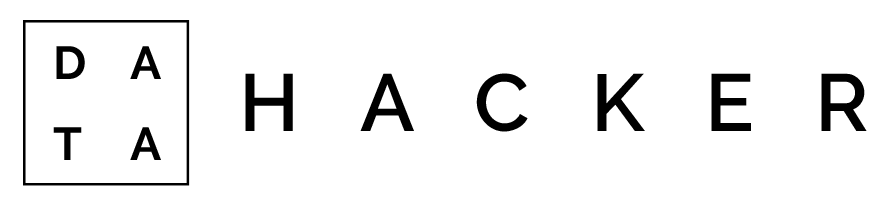
# Linear Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [ ]:
x_data = np.array([1, 2, 3, 4, 5])
y_data = x_data * 2

In [ ]:
plt.scatter(x_data, y_data)

Create a forward propagation function from the following formula $ y = mx + b$

In [ ]:
def forward(x, w, b=0):
  y_hat = x * w + b
  return y_hat

Create a squared error function for the later calculation of the mean squared error which is calculated as $\sum_{i=1}^{n}(\hat{Y}_i - Y_i)^2$

In [ ]:
def loss(y_hat, y):
  return (y_hat - y) ** 2

Iterate for `w` that goes from 0 to 4 with a step of 0.1 and calculate the loss depending on the $\hat{Y} $ that we got by doing the forward propagation. We save all the `losses` and `w` for later plotting.

In [ ]:
all_w = []
all_loss = []

for w in np.arange(0, 4, 0.1):
  l_sum = 0

  for i in range(len(x_data)):
    y_hat = forward(x_data[i], w)
    l = loss(y_hat, y_data[i])

    l_sum += l
  
  all_w.append(w)
  all_loss.append(l_sum / len(y_data))

In [ ]:
plt.stem(all_w, all_loss)

Creating tensors from the data we created and reshaping it to be `(-1, 1)`

In [ ]:
x_torch = torch.FloatTensor(x_data).reshape(-1, 1)
y_torch = torch.FloatTensor(y_data).reshape(-1, 1)

In [ ]:
x_torch

In [ ]:
y_torch

Set the weight, `w`, to be 5 and bias, `b`, to be 3 and set the `requires_grad` option to be `True` for the auto gradient calculation.

In [ ]:
w = torch.tensor(5., requires_grad=True)
b = torch.tensor(3., requires_grad=True)

Define the learning rate or $ alfa$.

In [ ]:
lr = 0.05

Iterate 1000 times and do the optimization fo the model parameters `w` and `b`.
This process consists of 5 steps.\
1) Do the forward propagation   `x_torch * w + b`\
2) Calculate the MSE\
3) Do the backpropagation `.backward()` on the loss that was calculated\
4) Update the weight and bias parameter\
5) Zero the gradients

In [ ]:
all_w = []
all_loss = []

for i in range(1000):
  y_hat = x_torch * w + b

  loss = torch.sum(torch.pow(y_torch - y_hat, 2) / len(y_torch))
  loss.backward()
  
  all_w.append(w.item())
  all_loss.append(loss.item())
  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

    all_w.append(w)
    all_loss.append(loss)

Do some predictions on the `x_torch` using `w` and `b`

In [ ]:
y_pred = x_torch * w + b

We can see that the prediction is correct

In [ ]:
y_pred

In [ ]:
y_data

Plot the original values as green dots and the prediction with a blue line.

In [ ]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')

We can also see that the weight and bias are correctly calculated.

In [ ]:
w, b

Test it on the number `3.5`, we should get `7`. `x * 2 + 0`, where `2` represents the `w` or weight and `0` represents the bias or `b`.

In [ ]:
x_test = torch.Tensor([3.5])

In [ ]:
x_test * w + b

## Full PyTorch implementation

Create a random set of numbers, 50 randomly generated x values in the interval from `[0, 10]`. Set `Y` to be `x * 3 - 4`.

In [ ]:
x = np.random.rand(50)
x = x * 10

In [ ]:
y = x * 3 - 4
y += np.random.randn(50)

Generate the Linear Model class using `torch.nn.Module`. In this class we create a initialization where we create one linear layer that we later use in the function `forward`.

In [ ]:
class LinearModel(torch.nn.Module):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.linear = torch.nn.Linear(1, 1)
  
  def forward(self, x):
    return self.linear(x)

Transform the `x` and `y` to be tensors. 

In [ ]:
x_torch = torch.FloatTensor(x).reshape(-1, 1)
y_torch = torch.FloatTensor(y).reshape(-1, 1)

Call the `LinearModel` class that we created and create a loss function and also a optimizer that will be used for optimizing or updating the weights.

In [ ]:
model = LinearModel()
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Train the model for 1000 epochs.\
1) Do the forward propagation.\
2) Calculate loss\
3) Backpropagation\
4) Update the parameters by using `optimizer.step()`\
5) Zero the gradients

In [ ]:
all_loss = []

for epoch in range(1000):
  y_hat = model(x_torch)

  loss = criterion(y_hat, y_torch)
  loss.backward()
  all_loss.append(loss.item())

  optimizer.step()
  optimizer.zero_grad()

Do some predictions on `x_torch`

In [ ]:
y_pred = model.forward(x_torch)

In [ ]:
plt.plot(x_torch, y_torch, 'go')
plt.plot(x_torch, y_pred.detach().numpy(), '--')

Print out the paramters `w` and `b` that are stored in `model.named_parameters()`

In [ ]:
for name, param in model.named_parameters():
  print(name, param)

Plot the loss that we saved in the training process

In [ ]:
plt.plot(np.arange(0, 200, 1), all_loss[:200])

In [ ]:
all_loss[:10]

In [ ]:
all_loss[-1]